In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,TargetEncoder
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False

## 获取数据

In [32]:
dt=pd.read_csv('train.csv')
dt2=pd.read_csv('test.csv')
dt.head()
# StandardHours Over18

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,37,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,0,54,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,1,34,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,0,39,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,1,28,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [33]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1100 non-null   int64 
 1   Age                       1100 non-null   int64 
 2   BusinessTravel            1100 non-null   object
 3   Department                1100 non-null   object
 4   DistanceFromHome          1100 non-null   int64 
 5   Education                 1100 non-null   int64 
 6   EducationField            1100 non-null   object
 7   EmployeeNumber            1100 non-null   int64 
 8   EnvironmentSatisfaction   1100 non-null   int64 
 9   Gender                    1100 non-null   object
 10  JobInvolvement            1100 non-null   int64 
 11  JobLevel                  1100 non-null   int64 
 12  JobRole                   1100 non-null   object
 13  JobSatisfaction           1100 non-null   int64 
 14  MaritalStatus           

In [34]:
dt.describe()

,Attrition,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,0.161818,36.999091,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,0.368451,9.037230,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


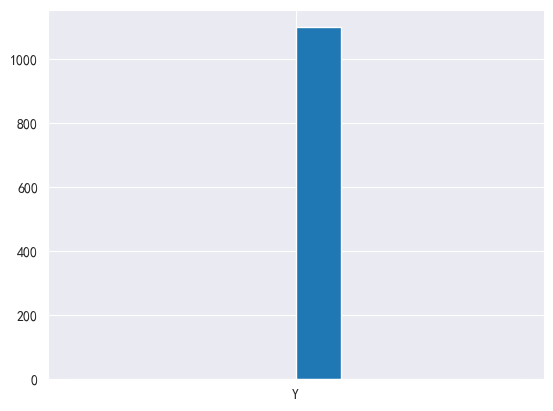

BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Research & Development' 'Sales' 'Human Resources']
EducationField:['Life Sciences' 'Medical' 'Other' 'Technical Degree' 'Human Resources'
 'Marketing']
Gender:['Male' 'Female']
JobRole:['Manufacturing Director' 'Laboratory Technician' 'Sales Executive'
 'Research Scientist' 'Healthcare Representative' 'Human Resources'
 'Sales Representative' 'Research Director' 'Manager']
MaritalStatus:['Divorced' 'Single' 'Married']
Over18:['Y']
OverTime:['No' 'Yes']


In [35]:
dt.isnull().sum()       # 有无缺失值
dt.duplicated().sum()   # 有无重复
# dt.columns
# StandardHours Over18
dt['Over18'].hist()     # 单变量分析
# dt['StandardHours'].hist()     # 单变量分析
plt.show()
# 筛选非数字的数据  Over18
for c in dt.columns:
    if dt[c].dtype == object:
        print(f'{c}:{dt[c].unique()}')
# StandardHours Over18

## 数据清洗

In [36]:
dt_c=dt.copy()      # 拷贝备份
print(dt.shape)
train_dt=dt.drop(['EmployeeNumber','StandardHours','Over18'],axis=1)
test_dt=dt2.drop(['EmployeeNumber','StandardHours','Over18'],axis=1)
train_dt.head()
# test_dt.head()
print(train_dt.shape)

(1100, 31)
(1100, 28)


In [37]:
# 数据拆分 -- 训练集
x=train_dt.drop('Attrition',axis=1)
y=train_dt['Attrition']
# 数据拆分 -- 测试集备用
x_test=test_dt.drop('Attrition',axis=1)
y_test=test_dt['Attrition']

## 探索性数据分析

<Axes: >

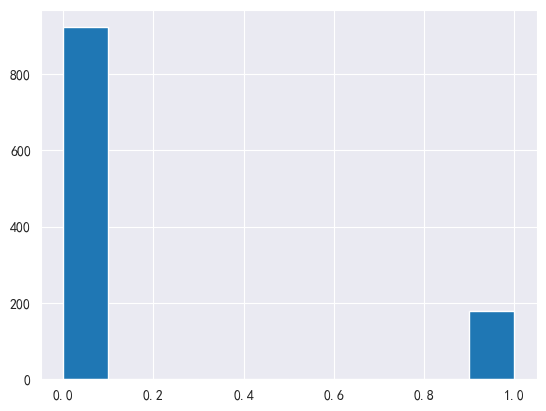

In [38]:
# 画图
dt['Attrition'].hist()      # 离职人数占比

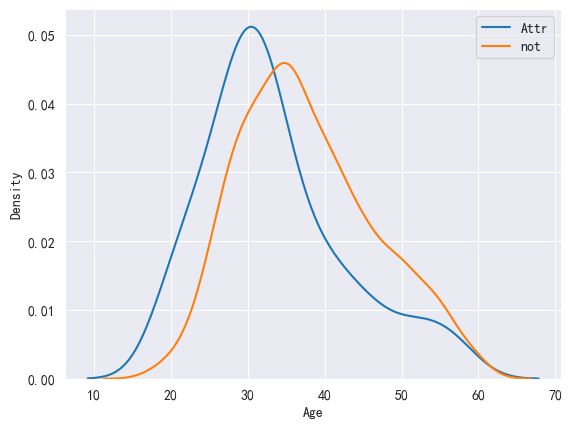

In [39]:
# 离职与否跟年龄的关系
sns.kdeplot(data = dt[dt['Attrition']==1], x='Age',label = 'Attr')
sns.kdeplot(data = dt[dt['Attrition']==0], x='Age',label = 'not')
plt.grid(True)
plt.legend(loc='best')

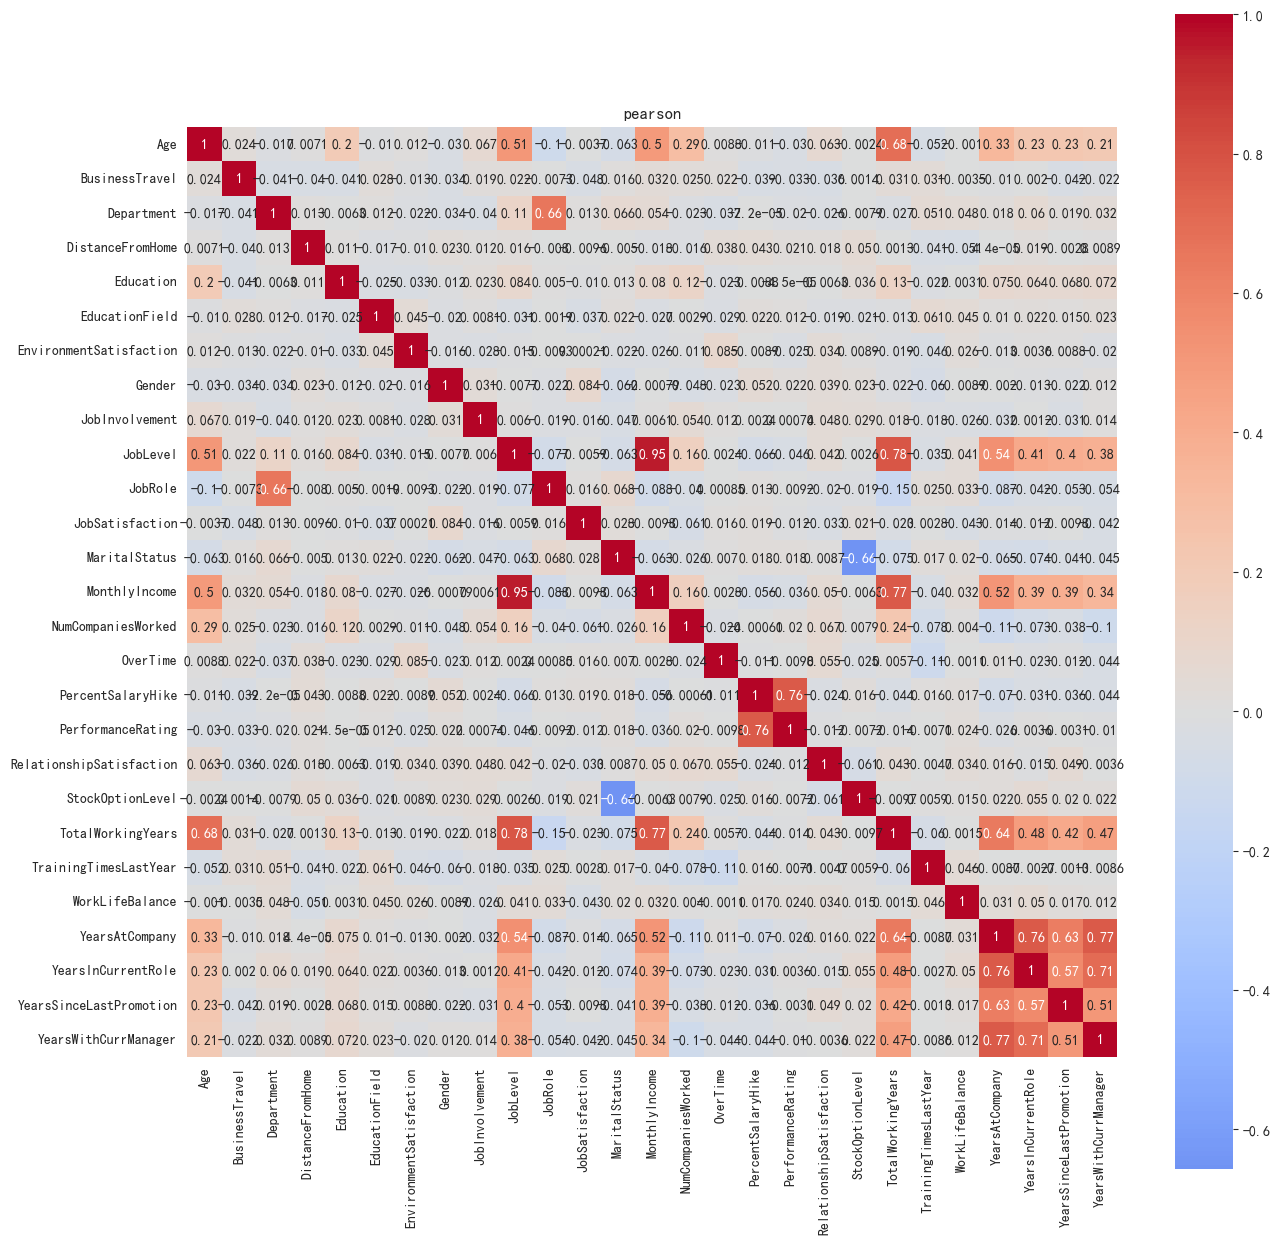

In [44]:
import seaborn as sns
corr_matrix = x.corr()

# 使用热图可视化
plt.figure(figsize=(15 ,15))
sns.heatmap(corr_matrix,
            annot=True,      # 显示数值
            cmap='coolwarm', # 颜色方案
            center=0,        # 颜色中心点
            square=True)     # 正方形单元格
plt.title('pearson')
plt.tight_layout()
plt.show()

## 特征工程


In [40]:
# 字符串转数字
le=LabelEncoder()
y=le.fit_transform(y)
y_test=le.fit_transform(y_test)

for i in x.columns:
    if x[i].dtype==object:
        x[i]=le.fit_transform(x[i])
for i in x_test.columns:
    if x_test[i].dtype==object:
        x_test[i]=le.fit_transform(x_test[i])

## 模型构建

In [41]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor, XGBClassifier


model=XGBClassifier()
param_grid={
    'n_estimators': [10, 20,50,100,150,200] ,
    'learning_rate':[0.1,0.5,1]}
# 网格搜索
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=4)
grid_search.fit(x,y)
# y_pred=grid_search.predict(x_test)
print(grid_search.best_params_)
bmodel=grid_search.best_estimator_

from sklearn.metrics import roc_auc_score
y_pred_proba=bmodel.predict_proba(x_test)[:,1]
r_a=roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {r_a:.4f}")

{'learning_rate': 0.1, 'n_estimators': 200}
ROC AUC Score: 0.8494


## 绘图

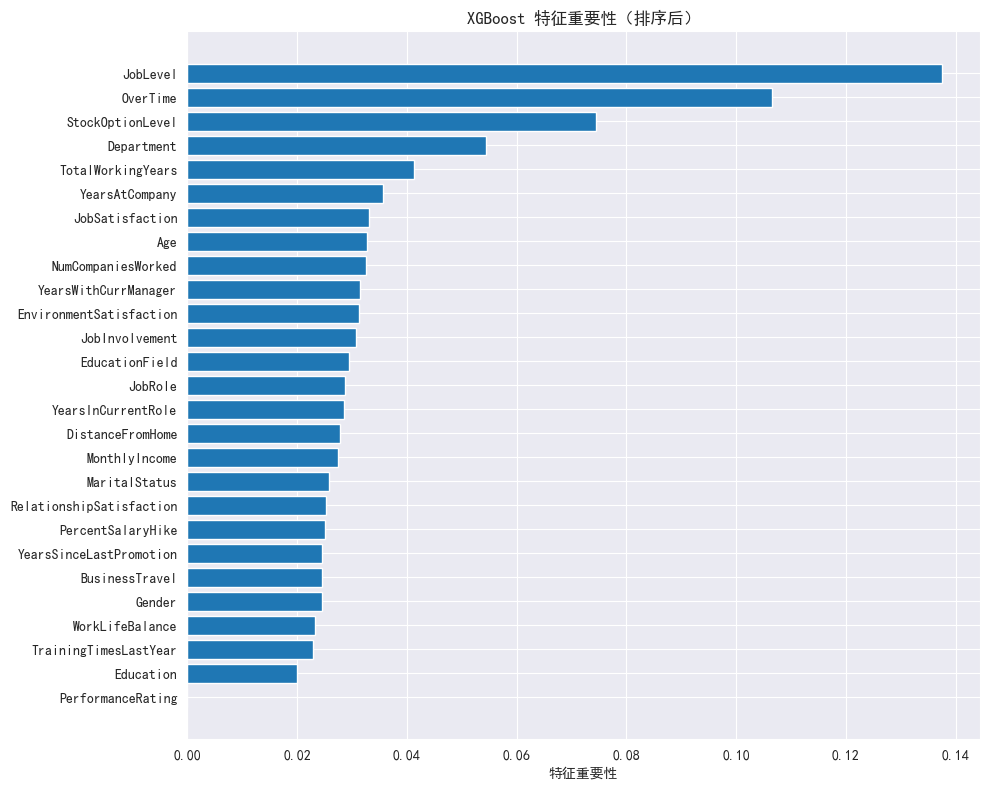

In [42]:
feature_importance = pd.DataFrame({
    'feature': bmodel.feature_names_in_,
    'importance': bmodel.feature_importances_
})

# 按重要性排序
feature_importance = feature_importance.sort_values('importance', ascending=True)

# 绘制水平条形图
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('特征重要性')
plt.title('XGBoost 特征重要性（排序后）')
plt.tight_layout()
plt.show()